# Pinterest Stock Price Prediction

In this project, we are going to analyse the historical data of Pinterest's stock prices and use the prophet algorithm to make predictions about the company's future stock prices. 

## Importing libraries and Downloading the dataset: 

In [1]:
!pip install plotly

In [2]:
!pip install pystan~=2.14
!pip install prophet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import plotly.express as px
from prophet import Prophet 

In [4]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
df = pd.read_csv("PINS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,66.000000,69.669998,64.500000,68.070000,68.070000,12825700
1,2021-01-05,67.919998,69.410004,67.449997,68.419998,68.419998,6482300
2,2021-01-06,66.029999,68.339996,64.739998,67.110001,67.110001,9518500
3,2021-01-07,67.709999,71.410004,67.709999,71.379997,71.379997,9870700
4,2021-01-08,72.199997,73.570000,69.500000,71.870003,71.870003,9102500
...,...,...,...,...,...,...,...
247,2021-12-27,37.020000,37.810001,36.790001,36.930000,36.930000,7052500
248,2021-12-28,36.610001,37.900002,36.331001,36.520000,36.520000,7074000
249,2021-12-29,36.209999,36.570000,35.049999,35.950001,35.950001,6911000
250,2021-12-30,36.000000,38.625000,35.849998,37.950001,37.950001,9244300


### Some Information regarding the variables of the Dataset: 

**Open:** The price of the first trade for any listed stock is its daily opening price. The opening price is an important marker for that day's trading activity, particularly for those interested in measuring short-term results such as day traders.

**High:** Today's high is the highest intraday price for a security on a given trading day. Today's high provides information to traders and investors on a stock's price, what news is driving the price that day, what might be a good entry and exit point into and out of the stock, and what the future outlook of the stock's price might be.

**Low:** Today’s low is a security's intraday low trading price. Today's low is the lowest price at which a stock trades over the course of a trading day.

**Close:** The closing price is the raw price or cash value of the last transacted price in a security before the market officially closes for normal trading. It is often the reference point used by investors to compare a stock's performance since the previous day—and closing prices are frequently used to construct line graphs depicting historical price changes over time.

**Adj Close:** Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

**Volume:** Volume measures the number of shares traded in a stock or contracts traded in futures or options. Volume can indicate market strength, as rising markets on increasing volume are typically viewed as strong and healthy. When prices fall on increasing volume, the trend is gathering strength to the downside.


## Exploratory Data Analysis: 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,62.409595,63.668837,60.814849,62.323135,62.323135,1.196592e+07
std,13.915346,14.111932,13.397768,13.839757,13.839757,1.011928e+07
min,34.950001,36.299999,34.070000,34.930000,34.930000,4.538800e+06
25%,52.832501,53.882498,51.627502,52.614999,52.614999,7.422700e+06
50%,63.024999,64.497501,62.040001,62.924999,62.924999,9.758050e+06
75%,73.239998,74.362501,70.738251,73.027502,73.027502,1.297160e+07
max,87.410004,89.900002,86.489998,89.150002,89.150002,1.133763e+08


#### Some of the observations are: 
* There are 252 columns in the dataset, which tells us that the stoch market is open on only weekdays.
* The highest closing value of the stock prices is 89.15 USD. 
* The lowest closing value of the stock prices iS 34.93 USD.
* The average closing value of the stock prices is 62.32 USD.

### Analysing the variation of closing prices on various dates: 

In [17]:
fig = px.area(df, x="Date", y="Close", title = 'Variation of Closing Prices: ', color_discrete_sequence=px.colors.qualitative.Prism, labels ={'Date' : "Date", 'Close' : 'Closing Price'})
fig.show()

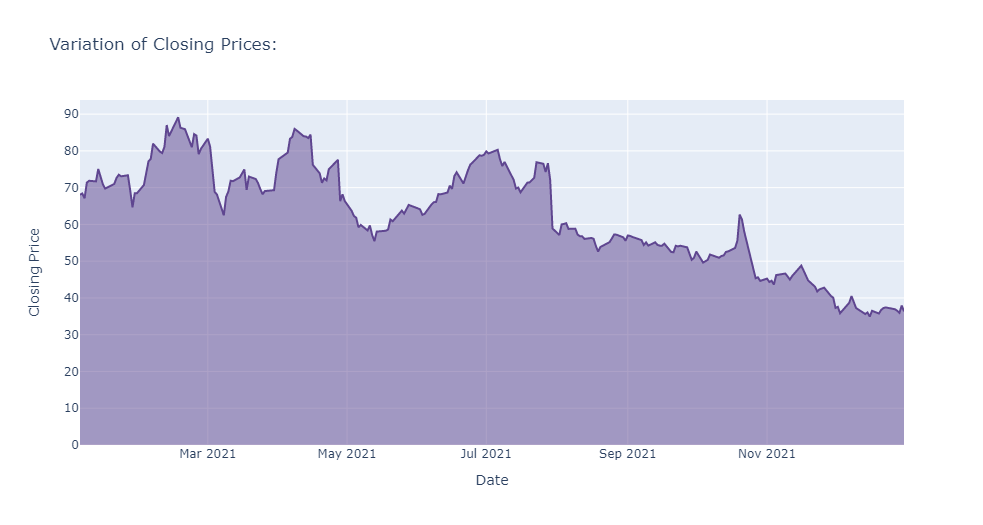

In [20]:
fig = px.box(df, y="Close", title = 'Variation of Closing Prices: ', color_discrete_sequence=px.colors.qualitative.Prism, labels ={'Close' : 'Closing Price'})
fig.show()

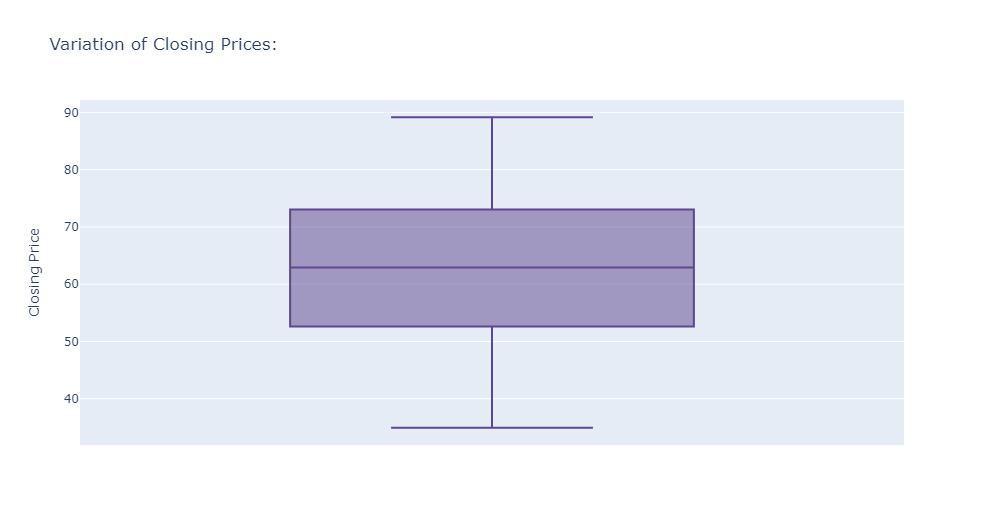

#### Observations from the above two graphs are: 
* The maximum closing price, which is 89.15 USD, was recorded on 16th February, 2021. 
* The minimum closing price, which is 34.93 USD, was recorded on 16th December, 2021. 
* The closing price of the stocks has mainly varied between 52.61 USD and 73.045 USD throughout the year 2021.
* The stock prices are said to have soared from Jan 2021 to July 2021 when the world faced the second wave of the coronavirus pandemic. 
* From August 2021, when the restrictions were eased throughout the world,it can be believed that people started being busy with offline activities and the stock prices dropped. 

### Analysing the volume of the Pinterest stocks throughout 2021: 

In [23]:
fig = px.bar(df, x="Date", y="Volume", title = 'Variation of Volume with Dates: ', color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

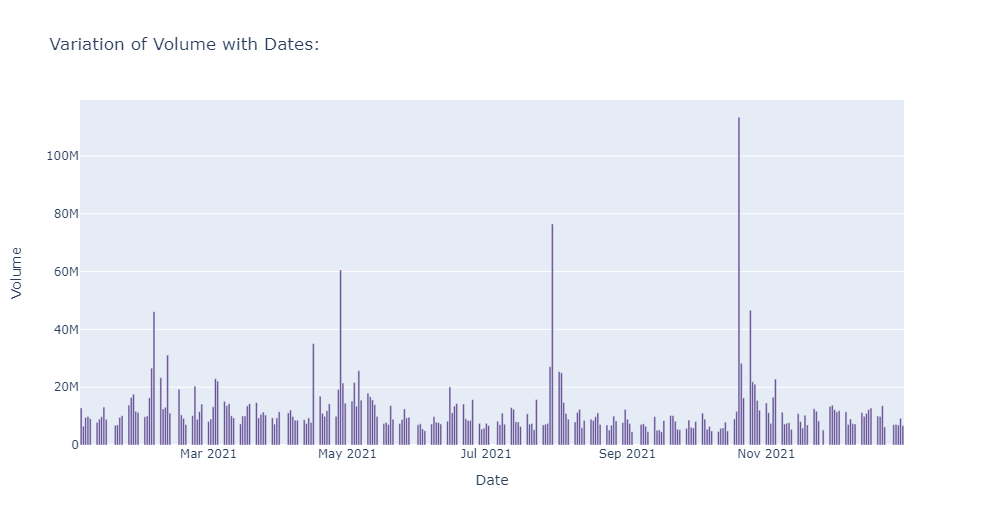

In [25]:
fig = px.bar(df, y="Volume", color = "Close", title = 'Variation of Volume with Closing Prices: ', color_discrete_sequence=px.colors.qualitative.Prism, labels = {'index': 'Index'})
fig.show()

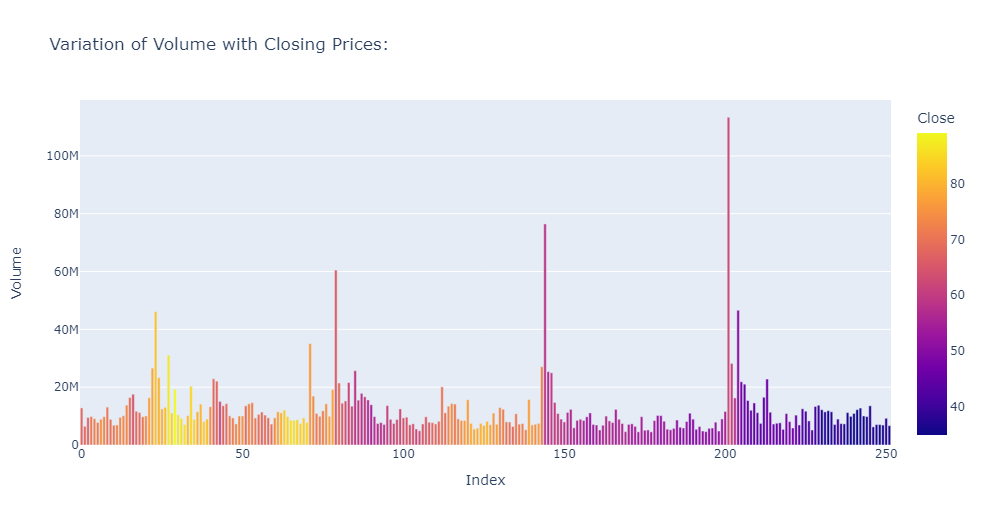

In [26]:
fig = px.box(df, y="Volume", title = 'Variation of Volume: ', color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

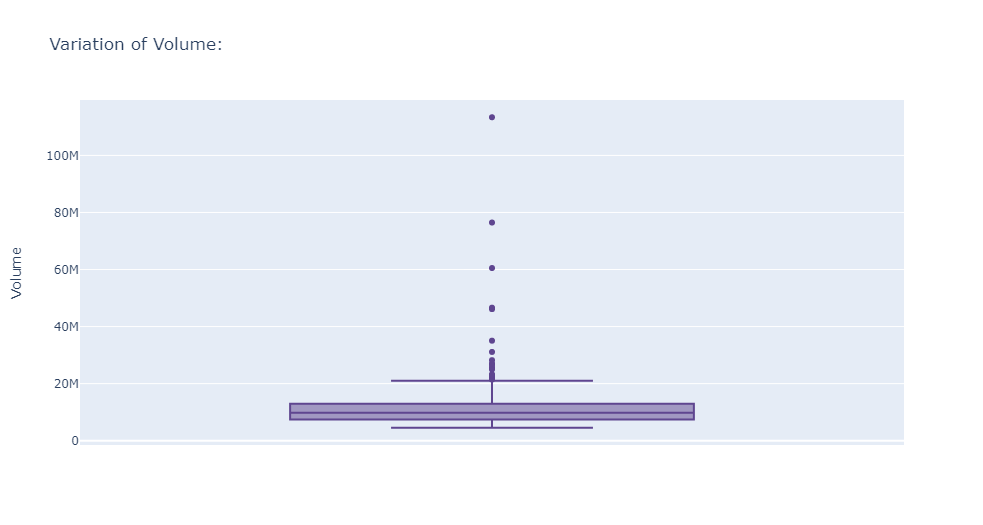

#### Observations from the above three graphs are: 
* The number of shares sold on a daily basis largely vary between 7.419 million and 12.99 million.
* The number of shares sold peaked four times throughout the year.
* The largest number of shares, 113.37 million, were sold on 20th October 2021 when Pinterest held its Annual Global Creators Festival.
* A massive number of shares, i.e, 76.475 million, were bought on 30th July 2021 when the company announced that the user growth in the United States, its largest market, was declining. This was due to the ease in the curbs set by the government due to the pandemic. 
* 60.52 million shares were sold on 28th April 2021 after the company announced its first quarter results and analysts predicted a growth of 105% in the second quarter. 
* A large number of shares, around 46.61 million, were sold on 5th February 2021 when the company introducted Story Pins on their app and website. The date also marked the start of Valentine's Week which is celebrated throughout the world. 

### Co-orelation: 
Some columns are more closely related to the target column compared to others. This relationship can be expressed numerically using a measure called co-orelation coefficient.

In [27]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995940,0.994338,0.989969,0.989969,0.082473
High,0.995940,1.000000,0.993505,0.995351,0.995351,0.110125
Low,0.994338,0.993505,1.000000,0.994989,0.994989,0.056745
Close,0.989969,0.995351,0.994989,1.000000,1.000000,0.084369
Adj Close,0.989969,0.995351,0.994989,1.000000,1.000000,0.084369
Volume,0.082473,0.110125,0.056745,0.084369,0.084369,1.000000


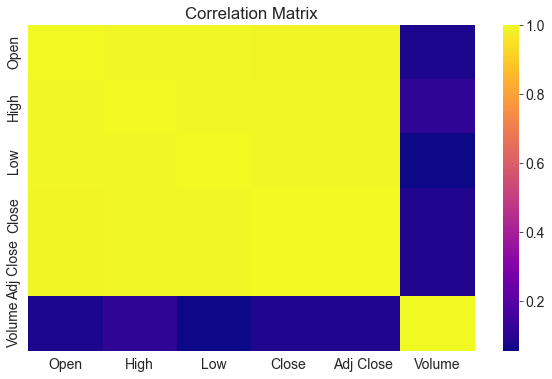

In [29]:
sns.heatmap(df.corr(), cmap='plasma', annot=False)
plt.title('Correlation Matrix');

## Data Preparation: 

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,66.000000,69.669998,64.500000,68.070000,68.070000,12825700
1,2021-01-05,67.919998,69.410004,67.449997,68.419998,68.419998,6482300
2,2021-01-06,66.029999,68.339996,64.739998,67.110001,67.110001,9518500
3,2021-01-07,67.709999,71.410004,67.709999,71.379997,71.379997,9870700
4,2021-01-08,72.199997,73.570000,69.500000,71.870003,71.870003,9102500
...,...,...,...,...,...,...,...
247,2021-12-27,37.020000,37.810001,36.790001,36.930000,36.930000,7052500
248,2021-12-28,36.610001,37.900002,36.331001,36.520000,36.520000,7074000
249,2021-12-29,36.209999,36.570000,35.049999,35.950001,35.950001,6911000
250,2021-12-30,36.000000,38.625000,35.849998,37.950001,37.950001,9244300


### Creating a new dataframe with only the dates and closing price columns:

In [31]:
columns= ['Date', 'Close']
newdf = pd.DataFrame(df, columns=columns)

In [32]:
newdf

,Date,Close
0,2021-01-04,68.070000
1,2021-01-05,68.419998
2,2021-01-06,67.110001
3,2021-01-07,71.379997
4,2021-01-08,71.870003
...,...,...
247,2021-12-27,36.930000
248,2021-12-28,36.520000
249,2021-12-29,35.950001
250,2021-12-30,37.950001


### Understanding Prophet:
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Facebook Prophet predicts data only when it is in a certain format. The dataframe with the data should have column saved as ds for time series data and y for the data to be forecasted. Here, we change the Date column to ds, and use the trends to predict the closing prices.

In [34]:
prophet_df = newdf.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2021-01-04,68.070000
1,2021-01-05,68.419998
2,2021-01-06,67.110001
3,2021-01-07,71.379997
4,2021-01-08,71.870003
...,...,...
247,2021-12-27,36.930000
248,2021-12-28,36.520000
249,2021-12-29,35.950001
250,2021-12-30,37.950001


## Creating the Facebook Prophet Model: 

In [35]:
m = Prophet()
m.fit(prophet_df)

12:00:38 - cmdstanpy - INFO - Chain [1] start processing
12:00:38 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting: 

We want our model to predict the closing prices for the next one year. Since the stock market operates only on weekdays, and the frequency of our data is 1 day, the periods = 251.

In [36]:
future = m.make_future_dataframe(periods=251)
forecast = m.predict(future)

In [38]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2021-01-04,76.158208,67.993507,83.955342,75.131342,75.131342,75.131342
1,2021-01-05,76.726891,68.646478,84.278217,75.084843,75.084843,75.084843
2,2021-01-06,76.443140,67.899367,84.657709,75.038343,75.038343,75.038343
3,2021-01-07,76.629438,68.772230,84.339358,74.991844,74.991844,74.991844
4,2021-01-08,76.372785,69.157509,84.934295,74.945344,74.945344,74.945344
...,...,...,...,...,...,...,...
498,2022-09-04,-14.826143,-24.641482,-4.959555,-11.256770,-16.959633,-5.550820
499,2022-09-05,-10.414647,-19.868706,-0.573474,-11.441512,-17.185182,-5.703817
500,2022-09-06,-9.984206,-19.847183,-0.578543,-11.626254,-17.408519,-5.857069
501,2022-09-07,-10.406200,-19.918430,-0.719747,-11.810997,-17.623917,-6.010321


In the table ds, as we know, is the time series data. yhat is the prediction, yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels). Next up we have trend which shows the long term growth, shrink or stagnancy of the data, trend_lower and trend_upper are the uncertainty levels.

In [51]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

fig = plot_plotly(m, forecast, ylabel='Closing Prices', xlabel='Dates')
fig.show()

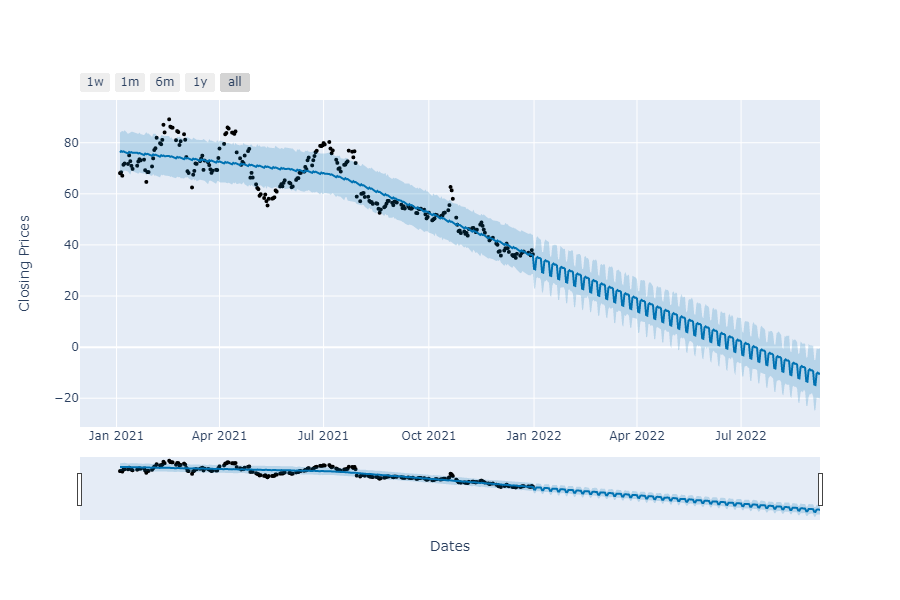

The above image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. Looking at our model, it is safe to say that the predictions are pretty accurate.

In [52]:
plot_components_plotly(m, forecast)

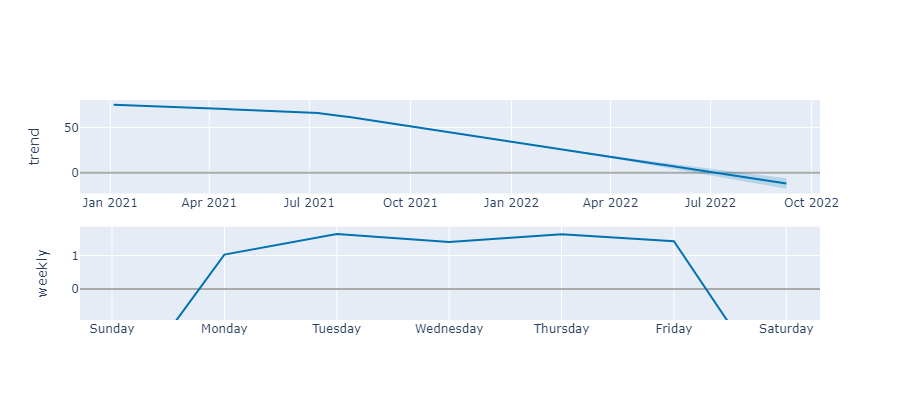

The above images shows the trends and seasonality(in a week) of the time series data. We can see that the stock prices are tend to decrease over the next year. The second graph tells us that the closing prices are highest on Tuesday and Thrusday.

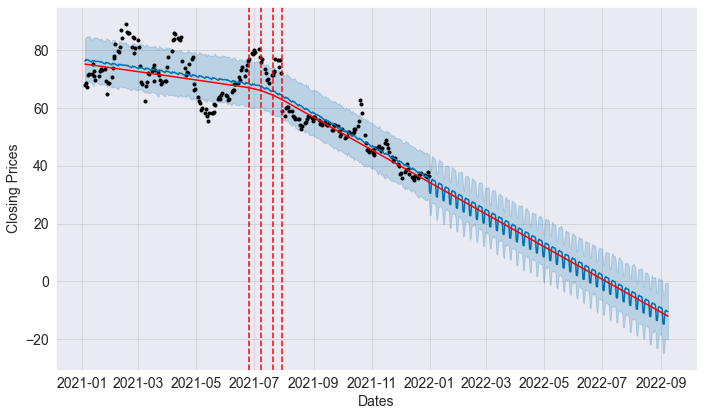

In [61]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, ylabel='Closing Prices', xlabel='Dates')
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Add changepoints to indicate the time in rapid trend growths. The dotted red lines show the time when there was a rapid change in the trend closing prices of the Pinterest's stocks.

## Evaluating the Model: 

### Cross-Validation: 
Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

Here we do cross-validation to assess prediction performance on a horizon of 100 days, starting with 250 days of training data in the first cutoff and then making predictions every 100 days. On this 1 year time series, this corresponds to 70 total forecasts.

In [69]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='250 days', period='100 days', horizon = '100 days')
df_cv

  0%|          | 0/1 [00:00<?, ?it/s]

13:22:49 - cmdstanpy - INFO - Chain [1] start processing
13:22:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-23,54.225256,45.139387,63.274016,54.020000,2021-09-22
1,2021-09-24,53.757133,45.499246,62.397208,54.200001,2021-09-22
2,2021-09-27,52.732241,44.025698,61.498154,53.770000,2021-09-22
3,2021-09-28,53.460978,43.974131,62.662964,51.950001,2021-09-22
4,2021-09-29,52.838006,44.344161,61.431773,50.369999,2021-09-22
...,...,...,...,...,...,...
65,2021-12-27,36.224625,27.495263,44.881516,36.930000,2021-09-22
66,2021-12-28,36.953361,27.483827,45.852580,36.520000,2021-09-22
67,2021-12-29,36.330389,27.162345,45.561020,35.950001,2021-09-22
68,2021-12-30,36.447823,26.966013,45.946325,37.950001,2021-09-22


#### Performance Metrics:
The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates.

In [71]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,1.961243,1.400444,1.114712,0.021605,0.019300,0.021301,1.0
1,12 days,2.440158,1.562101,1.348594,0.026367,0.029085,0.025967,1.0
2,13 days,3.098023,1.760120,1.598350,0.031460,0.037131,0.030921,1.0
3,14 days,3.152705,1.775586,1.622697,0.032130,0.037131,0.031523,1.0
4,15 days,2.828765,1.681893,1.424612,0.028318,0.037131,0.027771,1.0
...,...,...,...,...,...,...,...,...
59,96 days,3.772910,1.942398,1.518234,0.042322,0.040370,0.040938,1.0
60,97 days,1.447889,1.203283,1.000506,0.027423,0.019100,0.026940,1.0
61,98 days,0.891784,0.944343,0.767799,0.021072,0.011866,0.020792,1.0
62,99 days,0.784390,0.885658,0.734618,0.019798,0.011866,0.019796,1.0


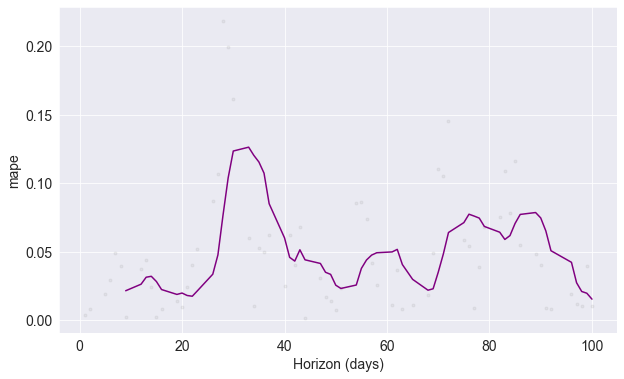

In [102]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape', color='Purple')

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 5% are typical for predictions 100 days into the future.